In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train_df.loc[:, ['Name', 'Ticket', 'Cabin']].nunique()

Name      891
Ticket    681
Cabin     147
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

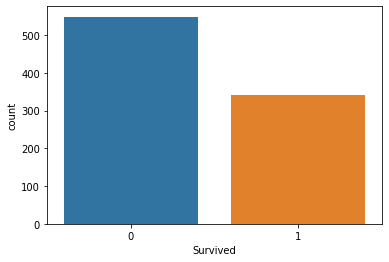

In [9]:
sns.countplot(x='Survived', data=train_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

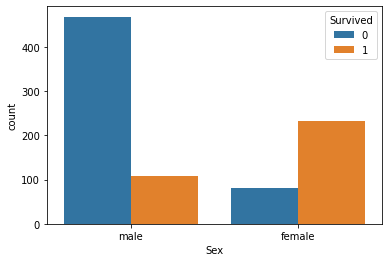

In [10]:
sns.countplot(x='Sex', hue='Survived', data=train_df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

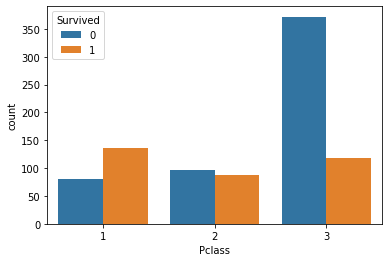

In [11]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

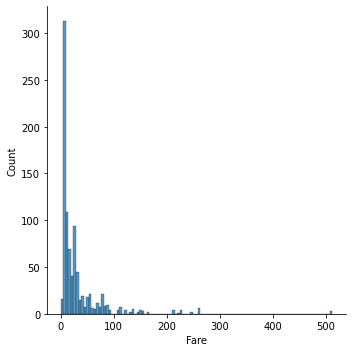

In [12]:
sns.displot(train_df['Fare'])

In [13]:
pass_id_train = train_df['PassengerId']
pass_id_test = test_df['PassengerId']
y_train = np.array(train_df['Survived'])

In [14]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch']
test_df['Family_size'] = test_df['SibSp'] + test_df['Parch']

In [15]:
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [16]:
SimpleImputer.get_feature_names_out = (lambda self, names=None: self.feature_names_in_)

In [17]:
pipe_embarked = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [18]:
transformer = make_column_transformer(
    (pipe_embarked, ['Embarked']),
    (SimpleImputer(strategy='mean'), ['Age']),
    (OneHotEncoder(drop='if_binary'), ['Sex', 'Pclass']),
    ('passthrough', ['Family_size']),
    n_jobs=-1)

In [19]:
pd.DataFrame(transformer.fit_transform(train_df), columns=transformer.get_feature_names_out())

,pipeline__Embarked_C,pipeline__Embarked_Q,pipeline__Embarked_S,simpleimputer__Age,onehotencoder__Sex_male,onehotencoder__Pclass_1,onehotencoder__Pclass_2,onehotencoder__Pclass_3,passthrough__Family_size
0,0.0,0.0,1.0,22.000000,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,38.000000,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,26.000000,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,35.000000,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,35.000000,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,1.0,27.000000,1.0,0.0,1.0,0.0,0.0
887,0.0,0.0,1.0,19.000000,0.0,1.0,0.0,0.0,0.0
888,0.0,0.0,1.0,29.699118,0.0,0.0,0.0,1.0,3.0
889,1.0,0.0,0.0,26.000000,1.0,1.0,0.0,0.0,0.0


In [20]:
clf = DecisionTreeClassifier(random_state=17)

In [21]:
pipe_model = make_pipeline(transformer, clf)

In [22]:
pipe_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'decisiontreeclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__pipeline', 'columntransformer__simpleimputer', 'columntransformer__onehotencoder', 'columntransformer__passthrough', 'columntransformer__pipeline__memory', 'columntransformer__pipeline__steps', 'columntransformer__pipeline__verbose', 'columntransformer__pipeline__simpleimputer', 'columntransformer__pipeline__onehotencoder', 'columntransformer__pipeline__simpleimputer__add_indicator', 'columntransformer__pipeline__simpleimputer__copy', 'columntransformer__pipeline__simpleimputer__fill_value', 'columntransformer__pipeline__simpleimputer__missing_values', 'columntransformer__pipeline__simpleimputer__strategy', 'columntransformer__pi

In [23]:
parameters = {}
parameters['decisiontreeclassifier__max_depth'] = [i for i in range(2, 10, 2)]
parameters['decisiontreeclassifier__min_samples_split'] = [i for i in range(2, 11)]
parameters['decisiontreeclassifier__min_samples_leaf'] = [i for i in range(1, 11)]

In [24]:
gccv = GridSearchCV(pipe_model, parameters, cv=5,  scoring = 'accuracy', n_jobs=-1)

In [25]:
gccv.fit(train_df, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Embarked']),
                                                                        ('simpleimputer',
                                                                         SimpleImputer(),
                                          

In [26]:
gccv.best_params_

{'decisiontreeclassifier__max_depth': 6,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 10}

In [27]:
gccv.best_score_

0.8182035026049841

In [28]:
gccv.score(train_df, y_train)

0.8439955106621774

In [29]:
predictions = gccv.predict(test_df)

In [30]:
output = pd.DataFrame({'PassengerId': pass_id_test, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

In [31]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
